In [6]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

train_new_model = True

if train_new_model:
    mnist = tf.keras.datasets.mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = tf.keras.utils.normalize(X_train, axis=1)
    X_test = tf.keras.utils.normalize(X_test, axis=1)

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=3)

    val_loss, val_acc = model.evaluate(X_test, y_test)
    print("Loss Value: ", val_loss)
    print("Accuracy Value: ", val_acc)

    model.save('handwritten_digits.keras')
else:
    model = tf.keras.models.load_model('handwritten_digits.keras')

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8662 - loss: 0.4725
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9642 - loss: 0.1180
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9773 - loss: 0.0727
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9643 - loss: 0.1127
Loss Value:  0.0988701805472374
Accuracy Value:  0.968999981880188


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
The number is probably a 5
Probabilities: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


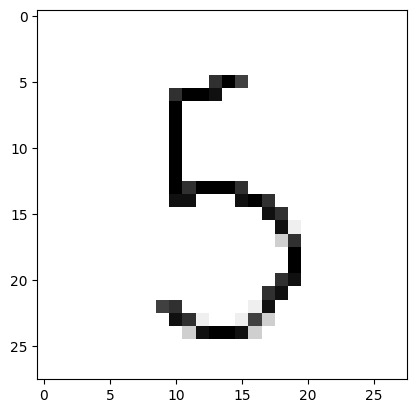

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The number is probably a 3
Probabilities: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


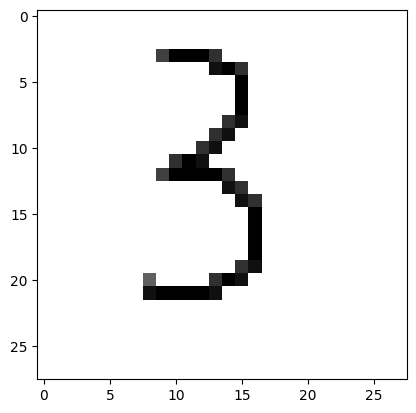

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The number is probably a 3
Probabilities: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


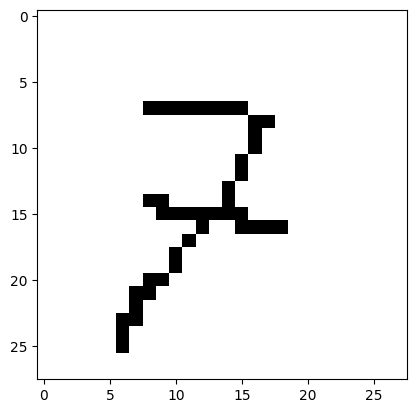

In [7]:
image_number = 1

while os.path.isfile('digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('digits/digit{}.png'.format(image_number))[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        print("Probabilities:", prediction[0])
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1